# **Iqbal Putra Rachadi - 11190940000024**

In [ ]:
import pandas as pd
import io 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import datetime

In [ ]:
#Import data yang akan digunakan
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Data = pd.read_excel(io.BytesIO(uploaded['Data_Dummy.xlsx']))
#Data

In [ ]:
url = 'https://raw.githubusercontent.com/Iqbalpr/Data_Dummy-Tanggal-waktu-dan-tempat-/main/Data_Dummy.csv'
Data = pd.read_csv(url)

In [ ]:
Data['Date-time'] = pd.to_datetime(Data['Date-time'], dayfirst=True)

In [ ]:
Data

,Date-time,Place
0,2022-03-01 06:30:00,Utan Kayu Selatan
1,2022-03-01 06:45:00,Pasar Minggu
2,2022-03-01 07:00:00,Tanjung Barat
3,2022-03-01 16:30:00,Pasar Minggu
4,2022-03-01 17:00:00,Utan Kayu Selatan
...,...,...
95,2022-03-20 06:30:00,Utan Kayu Selatan
96,2022-03-20 06:45:00,Pulo Gadung
97,2022-03-20 07:00:00,Kramat Jati
98,2022-03-20 16:30:00,Cipinang


In [ ]:
Data['Hari'] = Data['Date-time'].dt.day

In [ ]:
Data

,Date-time,Place,Hari
0,2022-03-01 06:30:00,Utan Kayu Selatan,1
1,2022-03-01 06:45:00,Pasar Minggu,1
2,2022-03-01 07:00:00,Tanjung Barat,1
3,2022-03-01 16:30:00,Pasar Minggu,1
4,2022-03-01 17:00:00,Utan Kayu Selatan,1
...,...,...,...
95,2022-03-20 06:30:00,Utan Kayu Selatan,20
96,2022-03-20 06:45:00,Pulo Gadung,20
97,2022-03-20 07:00:00,Kramat Jati,20
98,2022-03-20 16:30:00,Cipinang,20


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date-time  100 non-null    datetime64[ns]
 1   Place      100 non-null    object        
 2   Hari       100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
Data.index = pd.to_datetime(Data['Date-time'])
Data.drop(['Date-time'], axis=1, inplace=True)

In [ ]:
Data2 = pd.get_dummies(Data['Hari'], prefix='Tanggal')
Data2.head()

,Tanggal_1,Tanggal_2,Tanggal_3,Tanggal_4,Tanggal_5,Tanggal_6,Tanggal_7,Tanggal_8,Tanggal_9,Tanggal_10,Tanggal_11,Tanggal_12,Tanggal_13,Tanggal_14,Tanggal_15,Tanggal_16,Tanggal_17,Tanggal_18,Tanggal_19,Tanggal_20
Date-time,,,,,,,,,,,,,,,,,,,,
2022-03-01 06:30:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-01 06:45:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-01 07:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-01 16:30:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-01 17:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data3 = pd.concat([Data,Data2], axis=1)

In [ ]:
Data3.head()

,Place,Hari,Tanggal_1,Tanggal_2,Tanggal_3,Tanggal_4,Tanggal_5,Tanggal_6,Tanggal_7,Tanggal_8,...,Tanggal_11,Tanggal_12,Tanggal_13,Tanggal_14,Tanggal_15,Tanggal_16,Tanggal_17,Tanggal_18,Tanggal_19,Tanggal_20
Date-time,,,,,,,,,,,,,,,,,,,,,
2022-03-01 06:30:00,Utan Kayu Selatan,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 06:45:00,Pasar Minggu,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 07:00:00,Tanjung Barat,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 16:30:00,Pasar Minggu,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 17:00:00,Utan Kayu Selatan,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Point Of Interest**

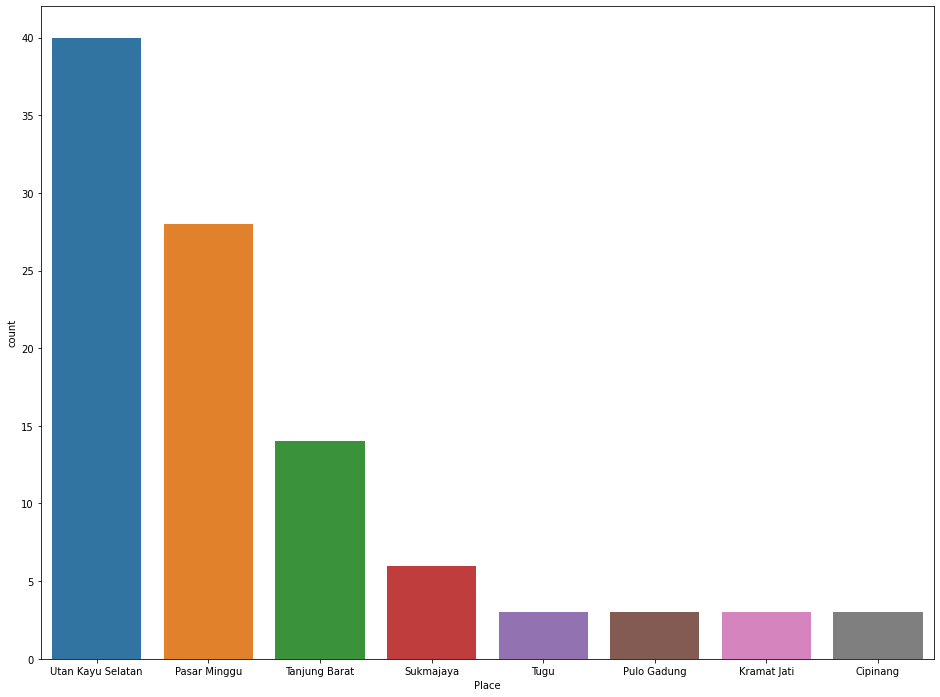

In [ ]:
plt.figure(figsize=(16,12)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
sns.countplot(x = 'Place', data = Data3)

Dari grafik di atas dapat disimpulkan bahwa **tempat tinggalnya** berada di daerah **Utan Kayu Selatan**, **rute terfavorit** adalah melewati **Pasar Minggu** dan **tempat kerja atau kantor** adalah didaerah **Tanjung Barat**. Sesuai dengan penjelasan data dan visualisasi pada Barisan Code ketiga, dimana perjalanan **dimulai dari Utan Kayu Selatan lalu menuju ke Pasar Minggu lalu ke Tanjung Barat lalu setelah beberapa jam menuju ke Pasar Minggu dan kembali lagi menuju Utan Kayu Selatan**

In [ ]:
Data['Place'].value_counts()

Utan Kayu Selatan    40
Pasar Minggu         28
Tanjung Barat        14
Sukmajaya             6
Tugu                  3
Pulo Gadung           3
Kramat Jati           3
Cipinang              3
Name: Place, dtype: int64

In [ ]:
Graf = nx.from_pandas_edgelist(Data3, "Hari", "Place", edge_attr=True, create_using=nx.MultiDiGraph())

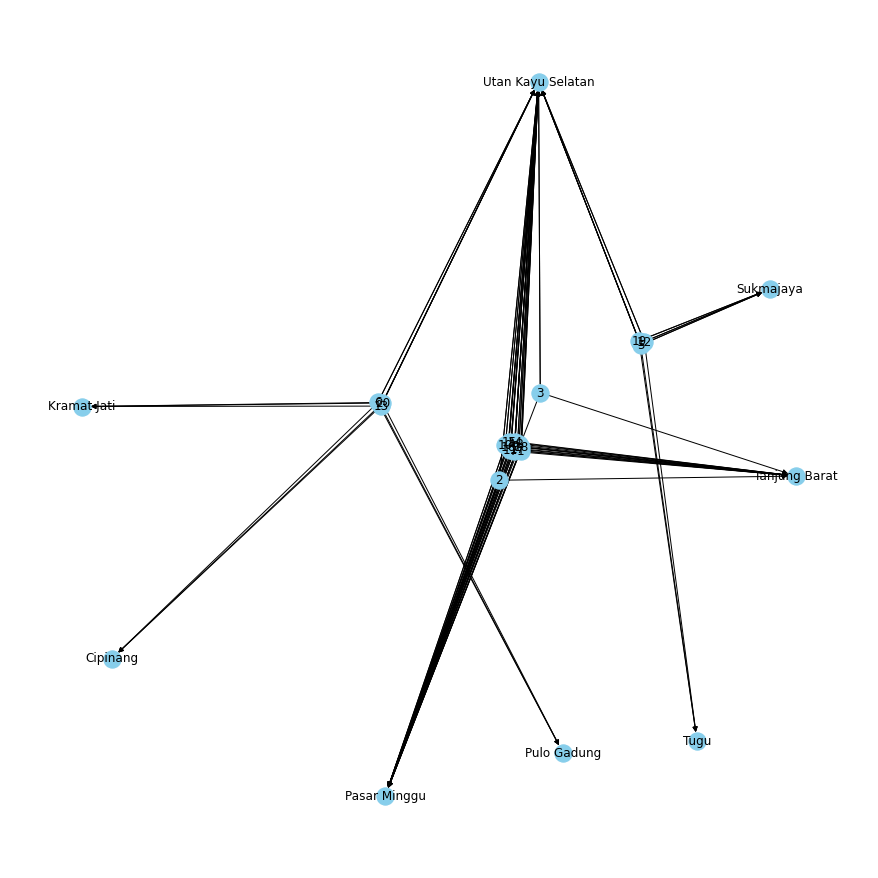

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(Graf)
nx.draw(Graf, with_labels=True, node_color="skyblue", edge_cmap=plt.cm.Blues, pos=pos)

plt.show()

Dengan bantuan Graf di atas, menunjukan rute terfavorit yang sering dilewati. Semakin tebal garis maka menandakan rute yang paling banyak dilewati adalah **Utan Kayu Selatan**, **Pasar Minggu** dan **Tanjung Barat**